<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_11_Machine_Learning_Laboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Load the Wine dataset**

In [ ]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()
X = wine_data.data  # features
y = wine_data.target  # labels

In [ ]:
X.shape, y.shape

((178, 13), (178,))

In [ ]:
np.unique(y)

array([0, 1, 2])

### **2. Implement PCA from scratch**
This code implements PCA to calculate the principal components manually:

In [ ]:
import numpy as np

class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        # Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Project data onto principal components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_reduced):
        # Reconstruct original data from principal components
        return np.dot(X_reduced, self.components.T) + self.mean

# Initialize and fit PCA
pca_scratch = PCAFromScratch(n_components=2)
pca_scratch.fit(X)

# Transform the data
X_pca_scratch = pca_scratch.transform(X)

In [ ]:
X_pca_scratch.shape

(178, 2)

### **3. Implement PCA using scikit-learn**
This section applies PCA with scikit-learn to compare results:

In [ ]:
from sklearn.decomposition import PCA

# Initialize and fit PCA using scikit-learn
pca_sklearn = PCA(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X)

In [ ]:
X_pca_sklearn.shape

(178, 2)

### **4. Calculate reconstruction errors**
Reconstruction errors measure how well each PCA implementation retains information.

In [ ]:
# Reconstruction using PCA from scratch
X_reconstructed_scratch = pca_scratch.inverse_transform(X_pca_scratch)
reconstruction_error_scratch = np.mean((X - X_reconstructed_scratch) ** 2)

# Reconstruction using PCA from sklearn
X_reconstructed_sklearn = pca_sklearn.inverse_transform(X_pca_sklearn)
reconstruction_error_sklearn = np.mean((X - X_reconstructed_sklearn) ** 2)
X_pca_scratch
print("Reconstruction Error (From Scratch):", reconstruction_error_scratch)
print("Reconstruction Error (Scikit-Learn):", reconstruction_error_sklearn)

Reconstruction Error (From Scratch): 1.3141299687799461
Reconstruction Error (Scikit-Learn): 1.3141299687799461


In [ ]:
X_reconstructed_scratch.shape, X_reconstructed_sklearn.shape

((178, 13), (178, 13))

### **5. Plot the PCA results side by side**

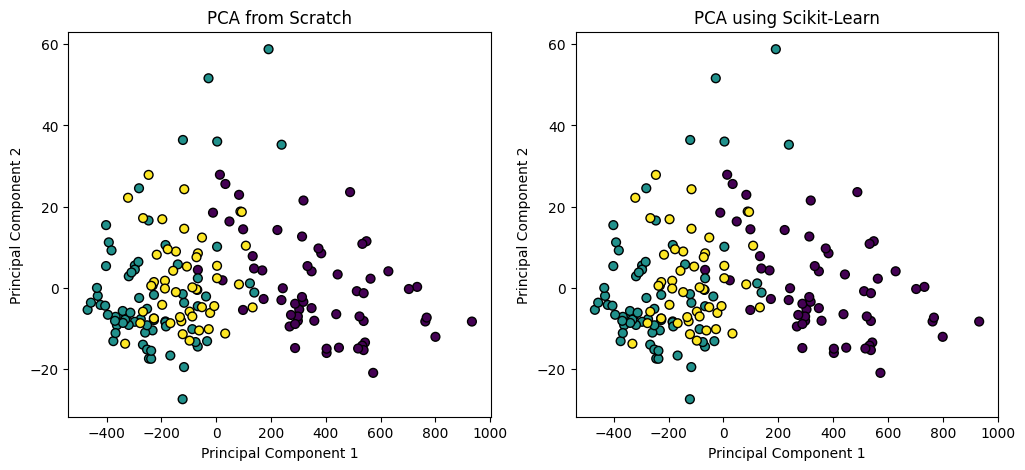

In [ ]:
import matplotlib.pyplot as plt

# Plot PCA from scratch
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_scratch[:, 0], X_pca_scratch[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title("PCA from Scratch")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Plot PCA using scikit-learn
plt.subplot(1, 2, 2)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title("PCA using Scikit-Learn")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

### **6. Implement LDA from scratch**

In [ ]:
from sklearn.preprocessing import StandardScaler

class LDAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.scalings_ = None

    def fit(self, X, y):
        # Compute overall mean
        mean_overall = np.mean(X, axis=0)
        classes = np.unique(y)
        S_w = np.zeros((X.shape[1], X.shape[1]))  # Within-class scatter matrix
        S_b = np.zeros((X.shape[1], X.shape[1]))  # between-class scatter matrix

        for c in classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)

            # Within-class scatter
            # S_w += np.cov(X_c - mean_c, rowvar=False) * (X_c.shape[0] - 1)
            S_w += (X_c - mean_c).dot((X_c - mean_c).T)

            # Between-class scatter
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(X.shape[1], 1)
            S_b += n_c * (mean_diff).dot(mean_diff.T)

        # Eigen decomposition of the matrix S_W^-1 * S_B
        eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

        # Sort the eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigvals)[::-1]
        eigvecs_sorted = eigvecs[:, sorted_indices]

        # Select the top n_components
        self.scaling = eigvecs_sorted[:, :self.n_components]
        return self.scaling


    def transform(self, X):
        return X.dot(self.scaling)

# Initialize and fit LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda_scratch = LDAFromScratch(n_components=2)
lda_scratch.fit(X_scaled, y)
X_lda_scratch = lda_scratch.transform(X_scaled)

### **7. Implement LDA using scikit-learn**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize and fit LDA using scikit-learn
lda_sklearn = LinearDiscriminantAnalysis(n_components=2, solver='eigen')
X_lda_sklearn = lda_sklearn.fit_transform(X_scaled, y)

### **8. Plot the LDA results side by side**

/Users/somdyutipaul/Library/Python/3.9/lib/python/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/somdyutipaul/Library/Python/3.9/lib/python/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


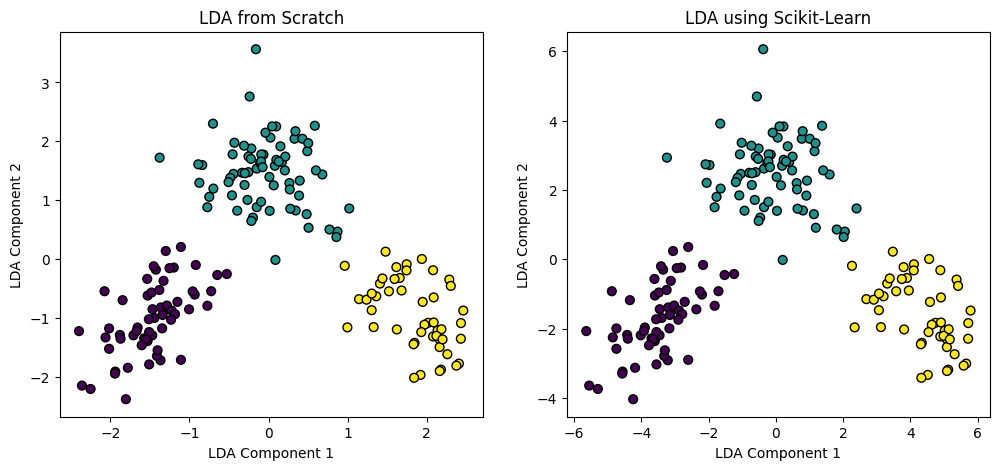

In [ ]:
# Plot LDA from scratch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_lda_scratch[:, 0], X_lda_scratch[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title("LDA from Scratch")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")

# Plot LDA using scikit-learn
plt.subplot(1, 2, 2)
plt.scatter(X_lda_sklearn[:, 0], X_lda_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title("LDA using Scikit-Learn")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")

plt.show()